In [1]:
import numpy as np
import pandas as pd

credit = pd.read_csv(r'creditcard.csv')

In [2]:
credit = credit.drop("Time", axis=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(credit.drop('Class', axis=1), credit['Class'], test_size=0.2, random_state=420)

In [4]:
print(f"fraud train: {y_train.value_counts()[1]}  fraud test: {y_test.value_counts()[1]}")

fraud train: 394  fraud test: 98


# Forging Data

In [5]:
print(y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])) # current ratio

0.001729245759178389


In [6]:
train = X_train
train['Class'] = y_train

In [7]:
fraud = train[train['Class'] == 1]
train = train[train['Class'] == 0] #clean train

In [8]:
COMPOSITION = 0.3

## Option 1: Copying Fraud Data

In [9]:
total_frauds = (len(X_train) * COMPOSITION)/(1.0 - COMPOSITION)
#total_frauds = int((len(X_train) * (1.0 + COMPOSITION)) * COMPOSITION)
full_df = int(total_frauds)/len(fraud)

In [10]:
new_fraud = pd.DataFrame(columns=X_train.columns)
for i in range(int(full_df)):
    new_fraud = new_fraud.append(fraud, ignore_index=True)

new_fraud = new_fraud.append(fraud.sample(frac=(full_df % 1)), ignore_index=True)

In [15]:
len(new_fraud) / (len(train) + len(new_fraud))

0.4287558453533557

In [14]:
train = train.append(new_fraud, ignore_index=True).sample(frac=1)
train = train.sample(frac=0.25)
X_train = train.drop("Class", axis=1)
y_train  = train['Class']

# Visualization

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True).fit(X_train)
train_pca = pca.transform(X_train)

In [19]:
df = pd.DataFrame(train_pca , columns = ["x1", "x2"])
df['Class'] = y_train

legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [20]:
#train_pca = train_pca.reshape(2, len(train_pca))

In [21]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.99507494 0.00347385]
0.9985487845748515


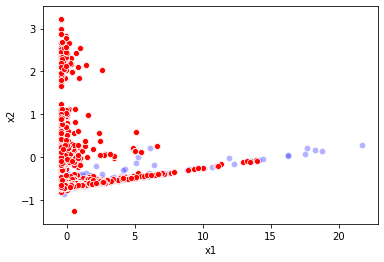

In [22]:
import seaborn as sns

sns.scatterplot(x=legit.x1, y=legit.x2, color='blue', alpha=0.3)
sns.scatterplot(x=fraud.x1, y=fraud.x2, color='red')

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Exploring different models

In [24]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, list(y_train))

Z:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_clf, X_train, list(y_train))

Z:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
Z:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [26]:
scores

array([0.94192929, 0.94331284, 0.94527287, 0.94292632, 0.93915984])

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, X_train, list(y_train), scoring='f1', cv=10)

cv_scores.mean()

0.999904296874635

In [ ]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)
#cv_scores = cross_val_score(svc, X_train, list(y_train), scoring='f1', cv=10)
svc.fit(X_train, list(y_train))

In [ ]:
predicts = svc.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matix(y_train, predicts)